# Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017

# Attribute Information:

Inputs
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

# Output or Labels:

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

We have to predict these two variables in our dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

We have imported few importatnt libraries for our dataset. We can see that we have all numerical columns. Also, We can check that our outputs:

1. Next_Tmax
2. Next_Tmin, both are numerical so we will proceed to build a regressor model. 

We have to first predict Next_Tmax and then Next_Tmin. 

In [4]:
temp = data.copy()

In [5]:
print("Dataset Shape is:")
print("Numbers of rows in our dataset are:",temp.shape[0])
print("Numbers of columns in our dataset are:",temp.shape[1])

Dataset Shape is:
Numbers of rows in our dataset are: 7752
Numbers of columns in our dataset are: 25


We have 7752 rows and 25 columns in our dataset. 

In [6]:
count_int = 0
count_obj = 0
for i in temp.columns:
    if temp[i].dtype == 'object':
        print("The column",i,"is of datatype Object")
        count_obj = count_obj+1
    else:
        print("The column",i,"is of datatype int or float")
        count_int = count_int+1
print("\nTotal columns with datatype Object is/are",count_obj)
print("Total columns with datatype int or float are",count_int)

The column station is of datatype int or float
The column Date is of datatype Object
The column Present_Tmax is of datatype int or float
The column Present_Tmin is of datatype int or float
The column LDAPS_RHmin is of datatype int or float
The column LDAPS_RHmax is of datatype int or float
The column LDAPS_Tmax_lapse is of datatype int or float
The column LDAPS_Tmin_lapse is of datatype int or float
The column LDAPS_WS is of datatype int or float
The column LDAPS_LH is of datatype int or float
The column LDAPS_CC1 is of datatype int or float
The column LDAPS_CC2 is of datatype int or float
The column LDAPS_CC3 is of datatype int or float
The column LDAPS_CC4 is of datatype int or float
The column LDAPS_PPT1 is of datatype int or float
The column LDAPS_PPT2 is of datatype int or float
The column LDAPS_PPT3 is of datatype int or float
The column LDAPS_PPT4 is of datatype int or float
The column lat is of datatype int or float
The column lon is of datatype int or float
The column DEM is o

Here are all the datatypes of our dataset. 

In [7]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
temp.isnull().sum().sum()

1248

Here we can see that we have null values in several columns. Total null values in our dataset are 1248

In [9]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Here is the information regrading our project. Name of the column non null counts in the columns and datatype of the columns. 

In [10]:
temp.describe(include='all')

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
count   7750.000000        7750   7682.000000   7682.000000  7677.000000   
unique          NaN         310           NaN           NaN          NaN   
top             NaN  11-08-2013           NaN           NaN          NaN   
freq            NaN          25           NaN           NaN          NaN   
mean      13.000000         NaN     29.768211     23.225059    56.759372   
std        7.211568         NaN      2.969999      2.413961    14.668111   
min        1.000000         NaN     20.000000     11.300000    19.794666   
25%        7.000000         NaN     27.800000     21.700000    45.963543   
50%       13.000000         NaN     29.900000     23.400000    55.039024   
75%       19.000000         NaN     32.000000     24.900000    67.190056   
max       25.000000         NaN     37.600000     29.900000    98.524734   

        LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS  \
count   7677.000000       7677.000000       7677.000000  7677.000000   
unique          NaN               NaN               NaN          NaN   
top             NaN               NaN               NaN          NaN   
freq            NaN               NaN               NaN          NaN   
mean      88.374804         29.613447         23.512589     7.097875   
std        7.192004          2.947191          2.345347     2.183836   
min       58.936283         17.624954         14.272646     2.882580   
25%       84.222862         27.673499         22.089739     5.678705   
50%       89.793480         29.703426         23.760199     6.547470   
75%       93.743629         31.710450         25.152909     8.032276   
max      100.000153         38.542255         29.619342    21.857621   

           LDAPS_LH    LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4  \
count   7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      62.505019     0.368774     0.356080     0.318404     0.299191   
std       33.730589     0.262458     0.258061     0.250362     0.254348   
min      -13.603212     0.000000     0.000000     0.000000     0.000000   
25%       37.266753     0.146654     0.140615     0.101388     0.081532   
50%       56.865482     0.315697     0.312421     0.262555     0.227664   
75%       84.223616     0.575489     0.558694     0.496703     0.499489   
max      213.414006     0.967277     0.968353     0.983789     0.974710   

         LDAPS_PPT1   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count   7677.000000  7677.000000  7677.000000  7677.000000  7752.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.591995     0.485003     0.278200     0.269407    37.544722   
std        1.945768     1.762807     1.161809     1.206214     0.050352   
min        0.000000     0.000000     0.000000     0.000000    37.456200   
25%        0.000000     0.000000     0.000000     0.000000    37.510200   
50%        0.000000     0.000000     0.000000     0.000000    37.550700   
75%        0.052525     0.018364     0.007896     0.000041    37.577600   
max       23.701544    21.621661    15.841235    16.655469    37.645000   

                lon          DEM        Slope  Solar radiation    Next_Tmax  \
count   7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
unique          NaN          NaN          NaN              NaN          NaN   
top             NaN          NaN          NaN              NaN          NaN   
freq            NaN          NaN          NaN              NaN          NaN   
mean     126.991397    61.867972     

The above infomation describes the basic mathematical details like mean, standard deviation and other details. Like Present_Tmax the maximum value is 37.60 and min is 20 and their mean is 29.76. Present_Tmin is having max value of: 29.9 and min value is 11.3 and so on.

In [11]:
temp.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

# Treating Null Values

In [12]:
temp.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [13]:
print(temp.isnull().sum())
print("Total Null Values in the dataset:",temp.isnull().sum().sum())

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64
Total Null Values in the dataset: 1248


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

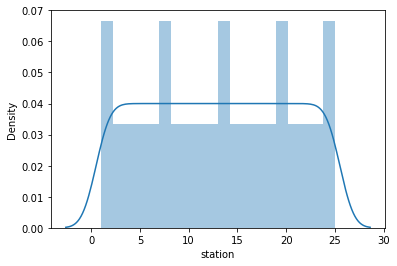

In [14]:
sns.distplot(temp['station'])
temp['station'].unique()

We can check that this colum is having just random values and it's not affecting out target variable so dropping this column. 

In [15]:
temp = temp.drop('station',axis=1)

In [16]:
temp['Date'].dtype

dtype('O')

We need to extract dates to different columns as this column is having a object datatype. 

In [17]:
temp['Date'] = temp['Date'].fillna(method='ffill')

We used forward fill method to fill the NaN values in the date column. 

In [18]:
temp['Day'] = pd.to_datetime(temp['Date'], format="%d-%m-%Y").dt.day
temp['Month'] = pd.to_datetime(temp['Date'], format="%d-%m-%Y").dt.month
temp['Year'] = pd.to_datetime(temp['Date'], format="%d-%m-%Y").dt.year

We have extracted the day month and year from the Date column. 

In [19]:
temp = temp.drop('Date',axis=1)

We have dropped the date column as we are having all the information in three different columns.

In [20]:
col = temp.columns
col

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [21]:
for i in col:
    if temp[i].dtype == 'float64':
        if (temp[i].skew() > 0.55 or temp[i].skew() < -0.55):
            temp[i] = temp[i].fillna(temp[i].median())
        else:
            temp[i] = temp[i].fillna(temp[i].mean())
    else:
        print(i,":Object datatype")

Day :Object datatype
Month :Object datatype
Year :Object datatype


In [22]:
temp.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

We have removed all the null values from the dataset. The columns having normal distribution their null value are replaces with mean and non normal distribution replaced with median. 

In [23]:
col = temp.columns

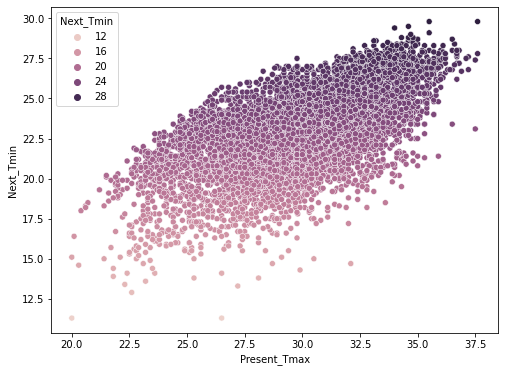

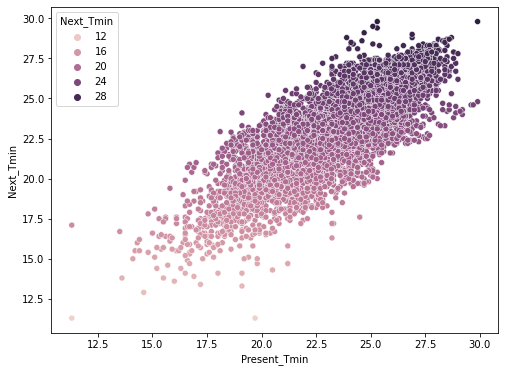

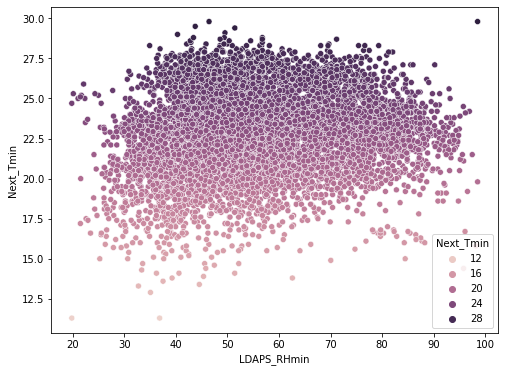

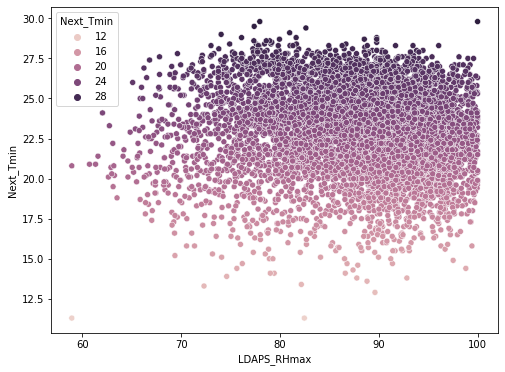

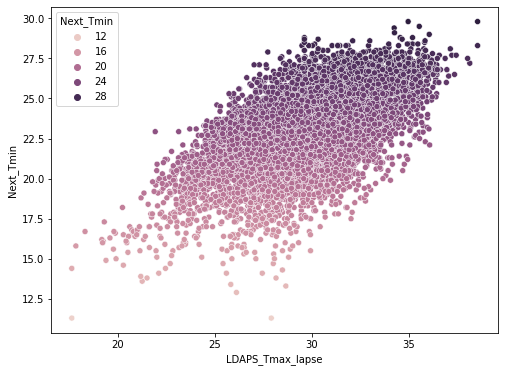

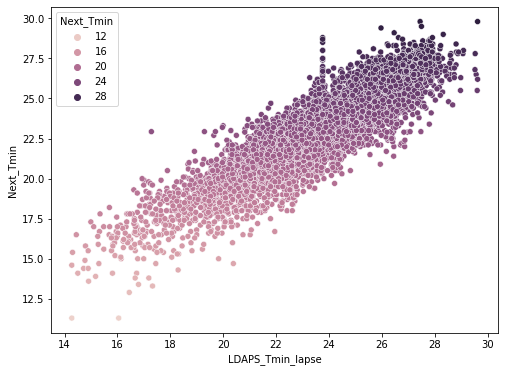

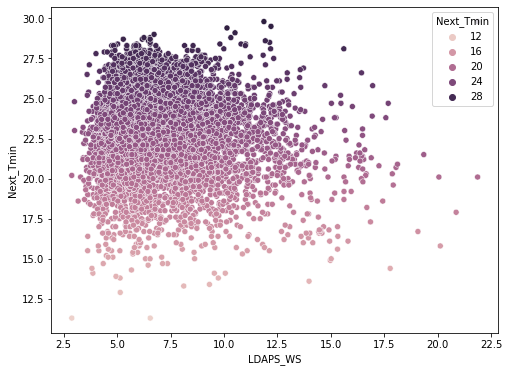

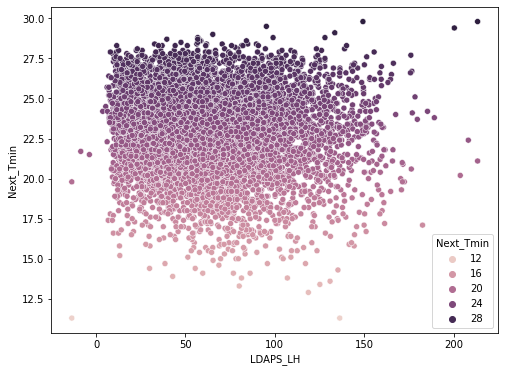

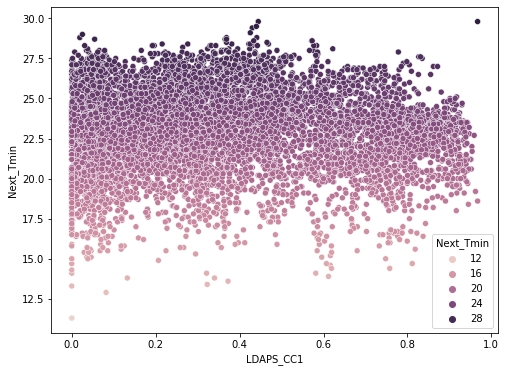

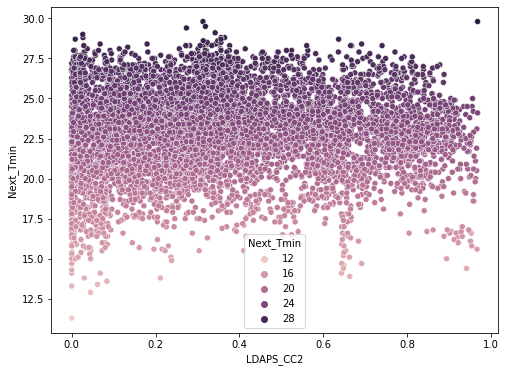

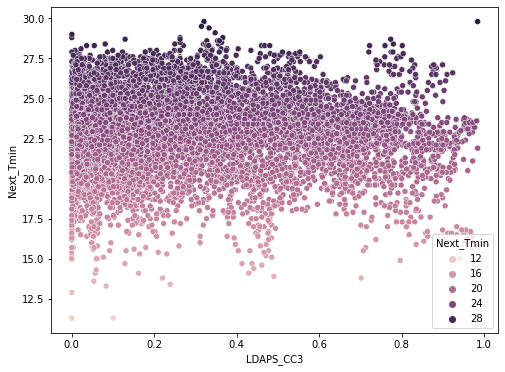

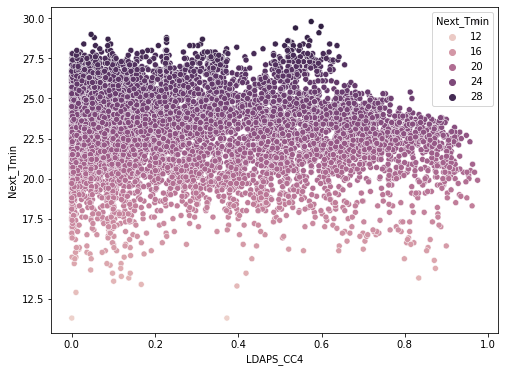

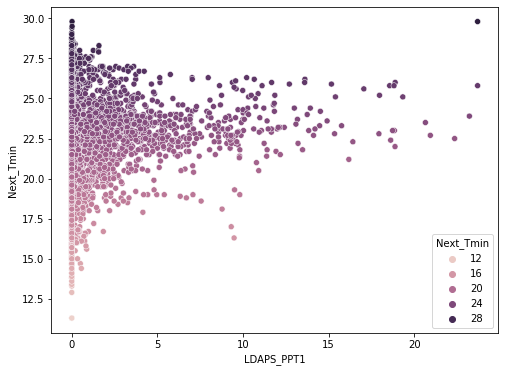

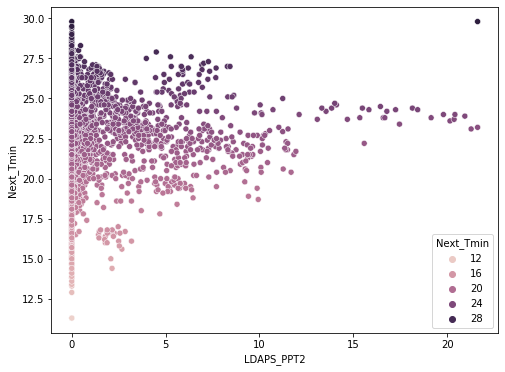

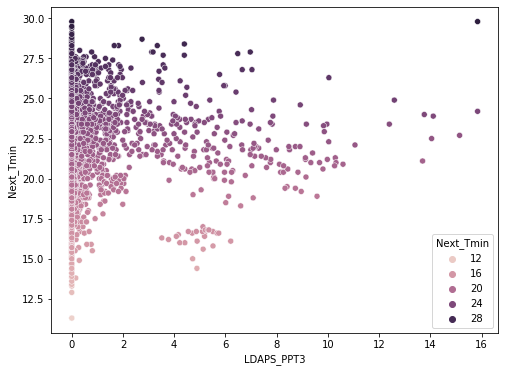

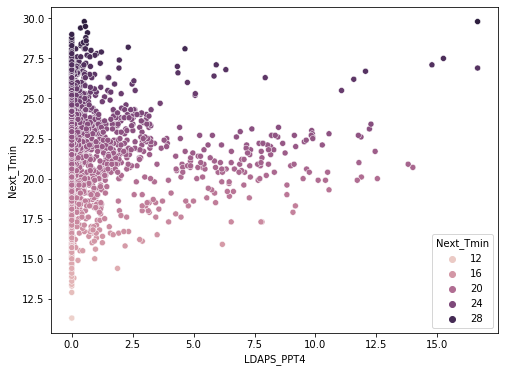

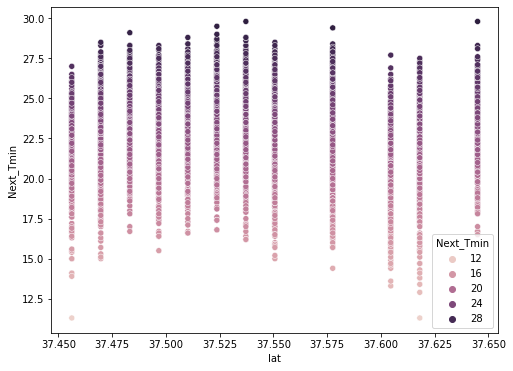

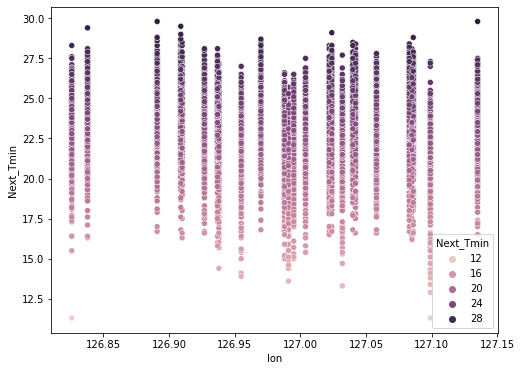

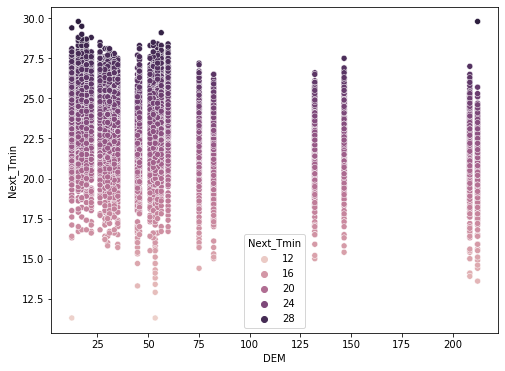

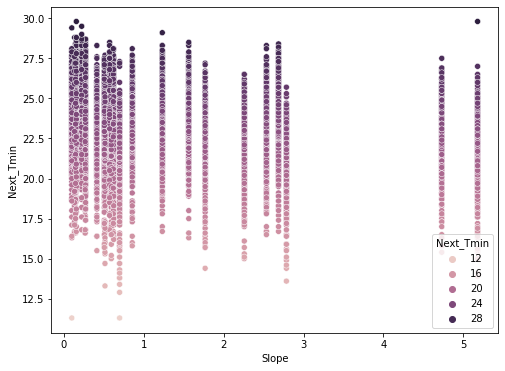

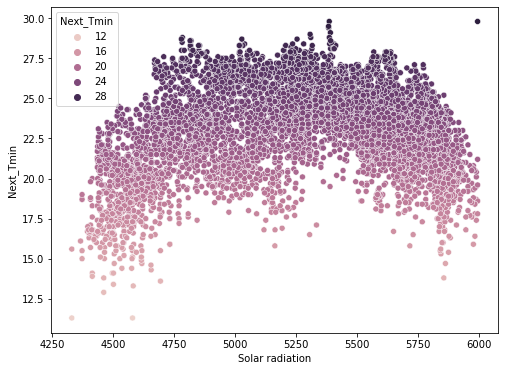

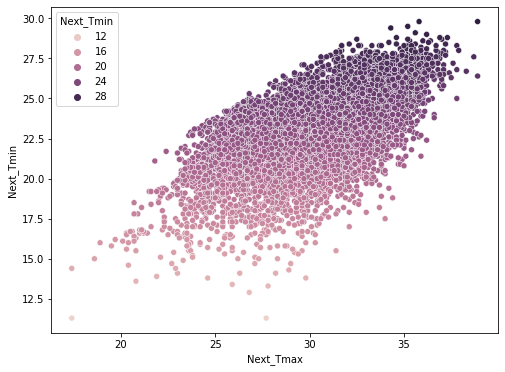

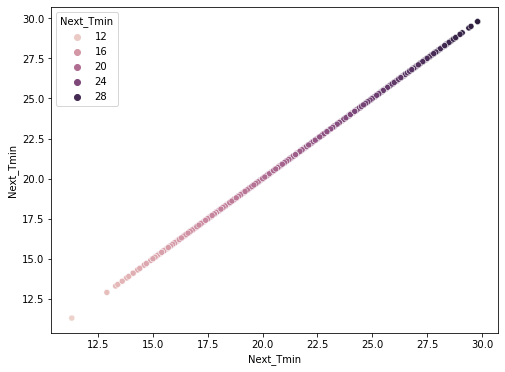

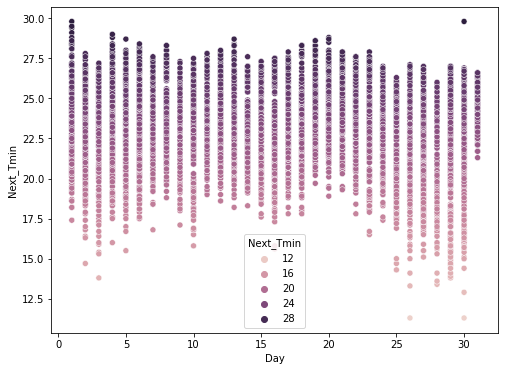

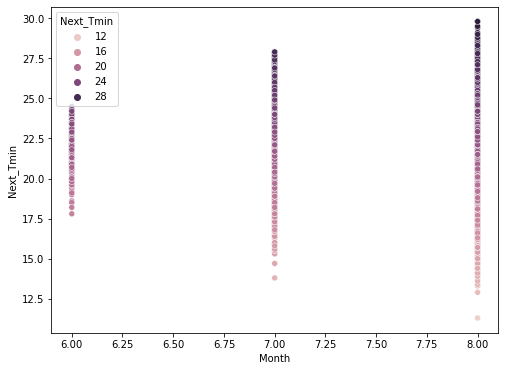

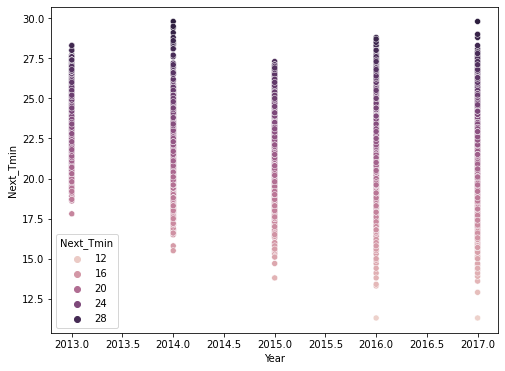

In [24]:
for i in col:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x = i , y = 'Next_Tmin' , data = temp , hue = 'Next_Tmin' )
    plt.show()

Above we have plotted the scatter plot for the dataset and we can see some columns are related to each other as the value in these increasing our target is changing. 

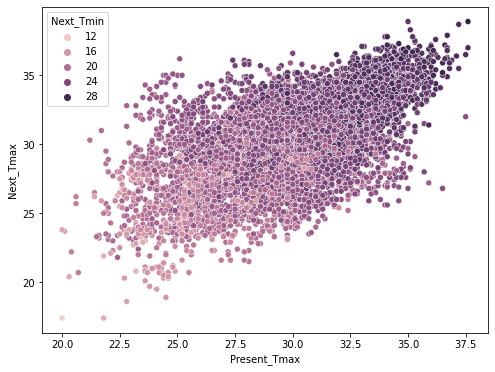

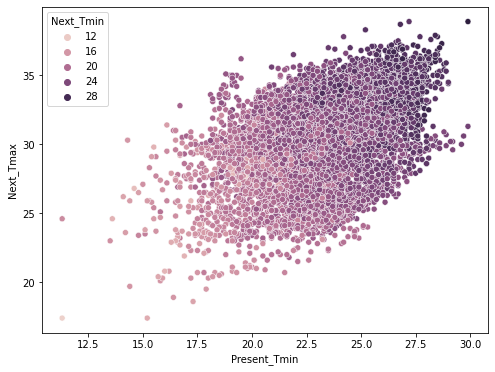

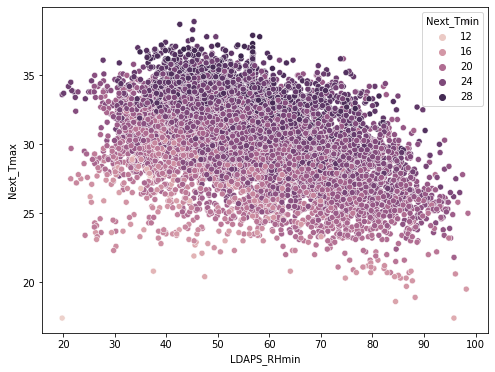

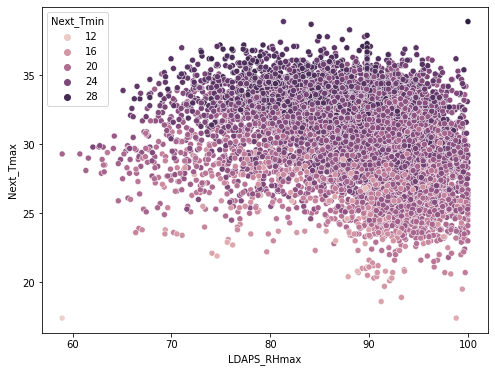

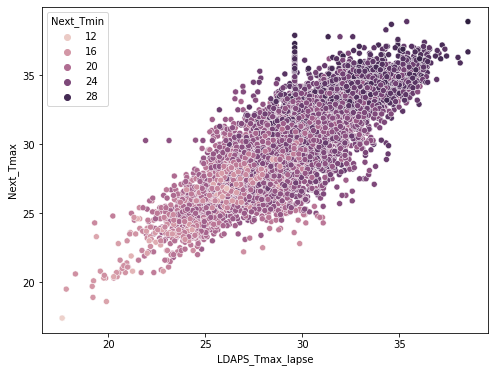

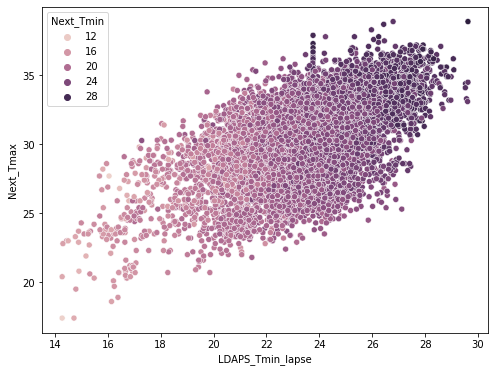

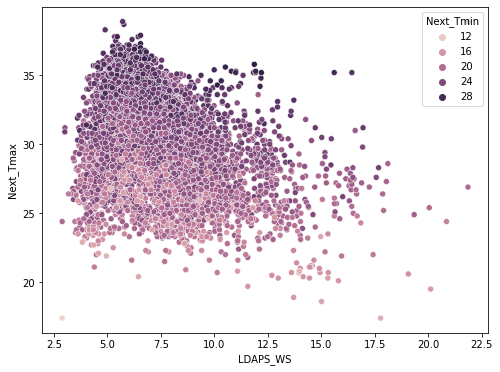

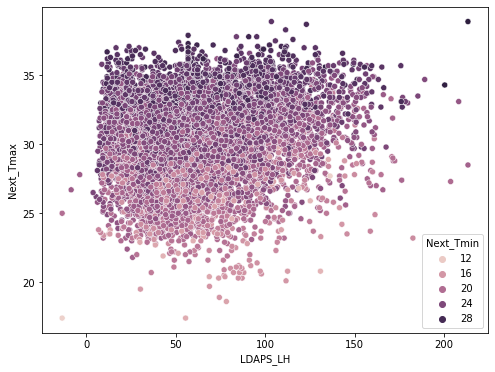

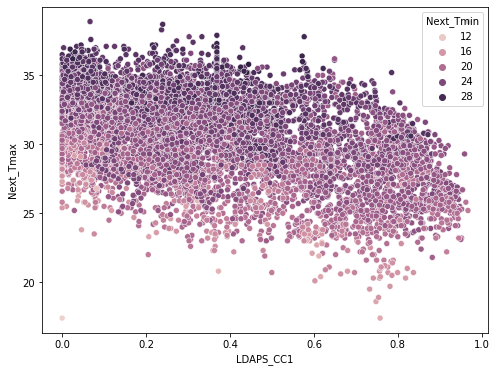

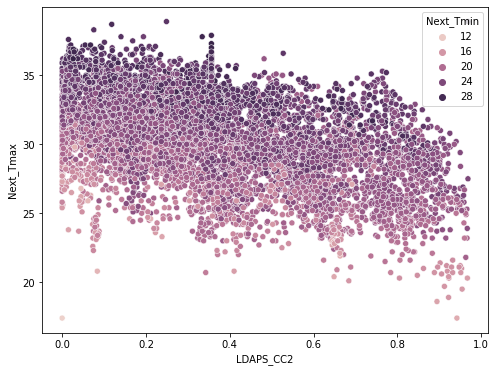

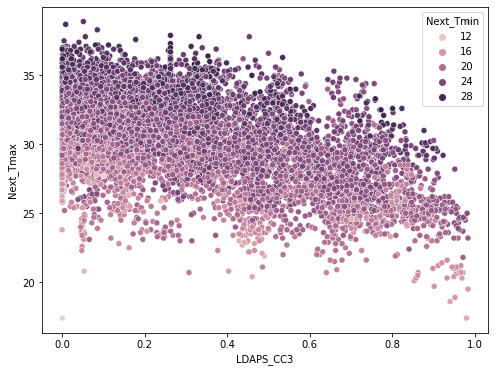

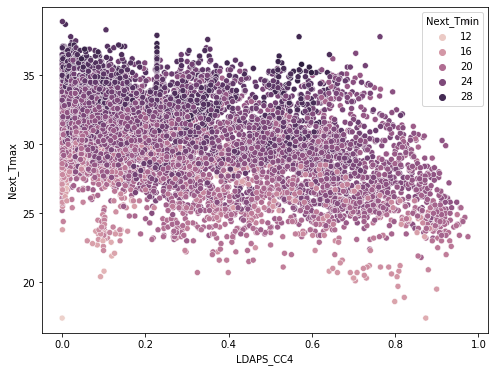

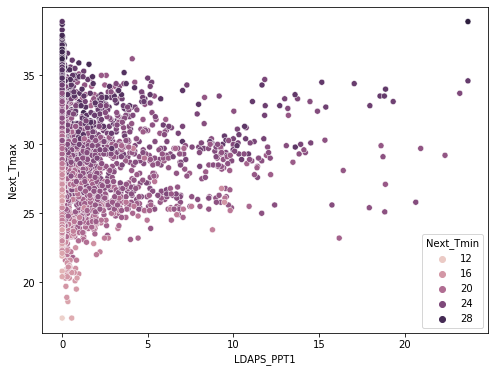

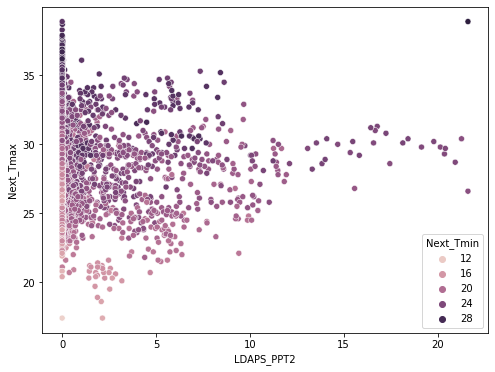

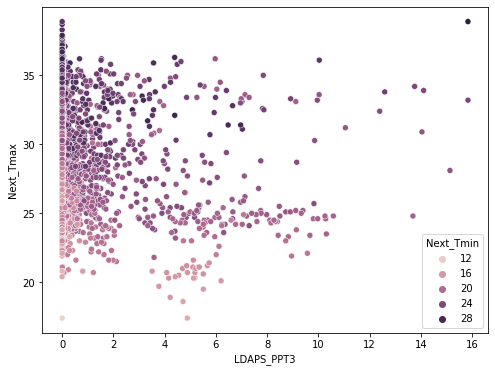

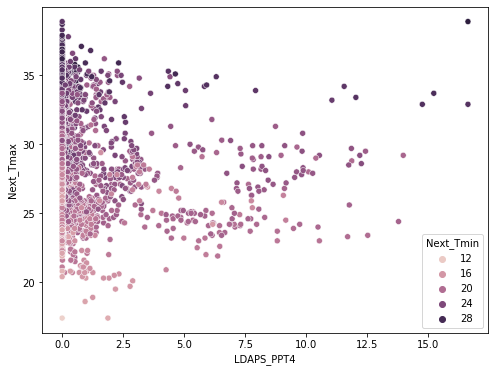

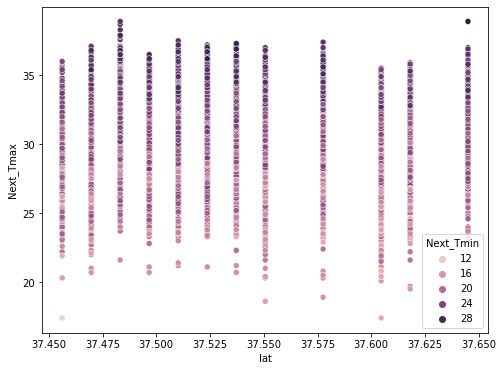

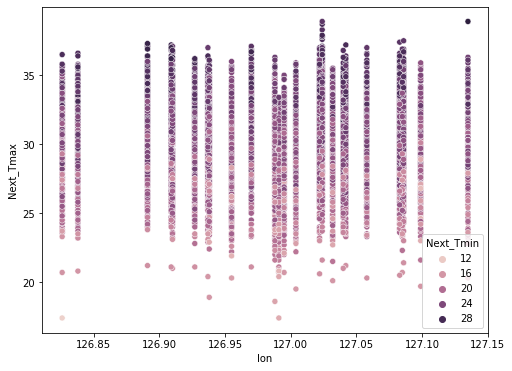

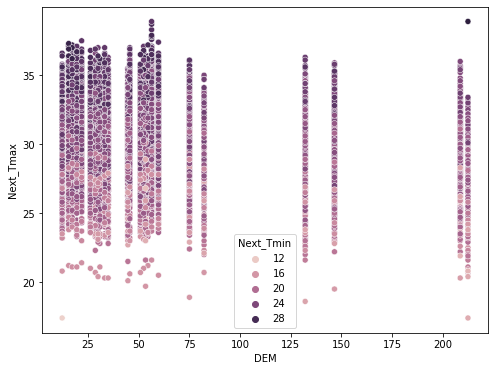

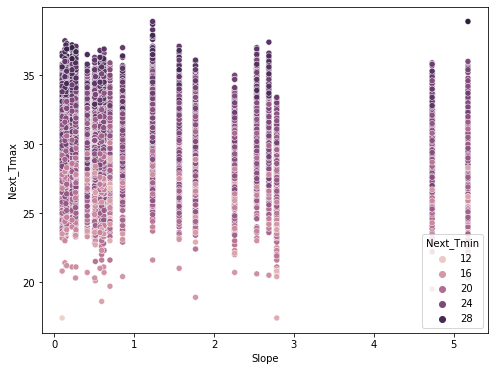

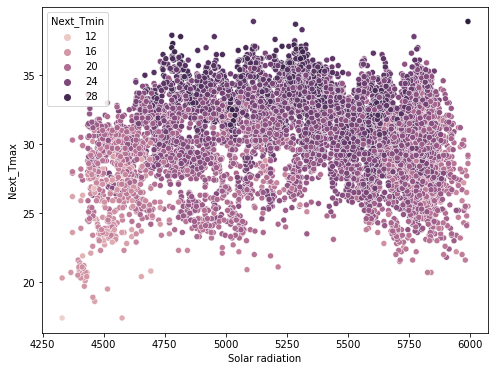

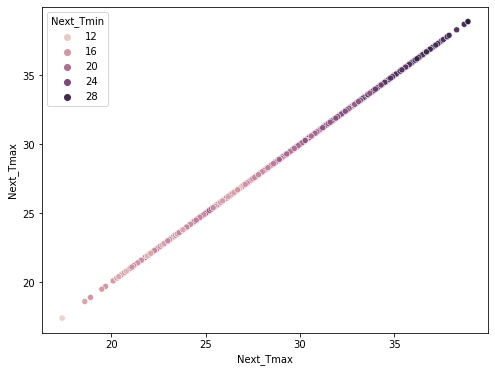

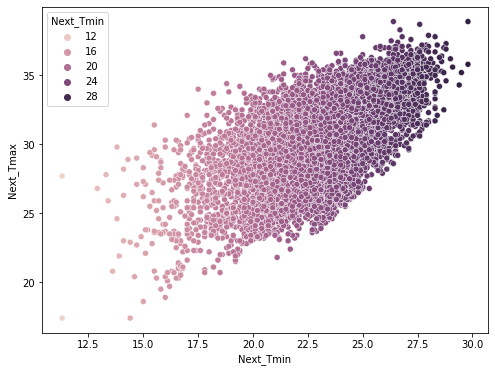

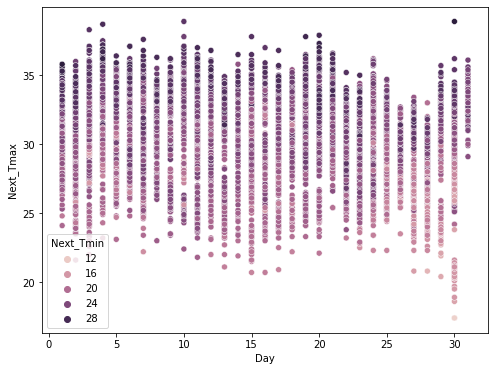

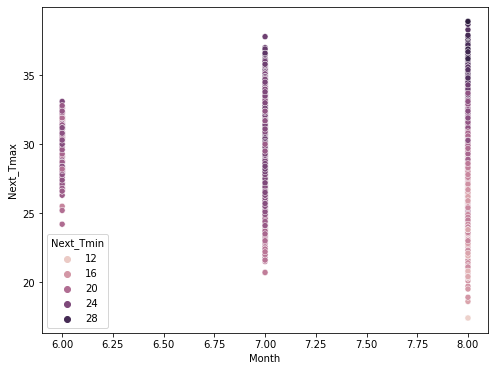

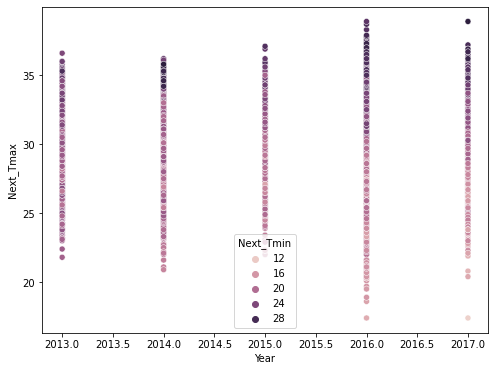

In [25]:
for i in col:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x = i , y = 'Next_Tmax' , data = temp , hue = 'Next_Tmin' )
    plt.show()

We have now plotted the graph for all the variable against our sencond target variable that is next_tmax and we get the imilar results. 

Present_Tmax            AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Present_Tmin         AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
LDAPS_RHmin          AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
LDAPS_RHmax          AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
LDAPS_Tmax_lapse     AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
LDAPS_Tmin_lapse     AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
LDAPS_WS             AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
LDAPS_LH               AxesSubplot(0.125,0.518913;0.0945122x0.16413)
LDAPS_CC1           AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
LDAPS_CC2           AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
LDAPS_CC3           AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
LDAPS_CC4           AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
LDAPS_PPT1          AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
LDAPS_PPT2          AxesSubplot(0.805488,0.518913;0.0945122x0.16413)
LDAPS_PPT3             AxesSubplot

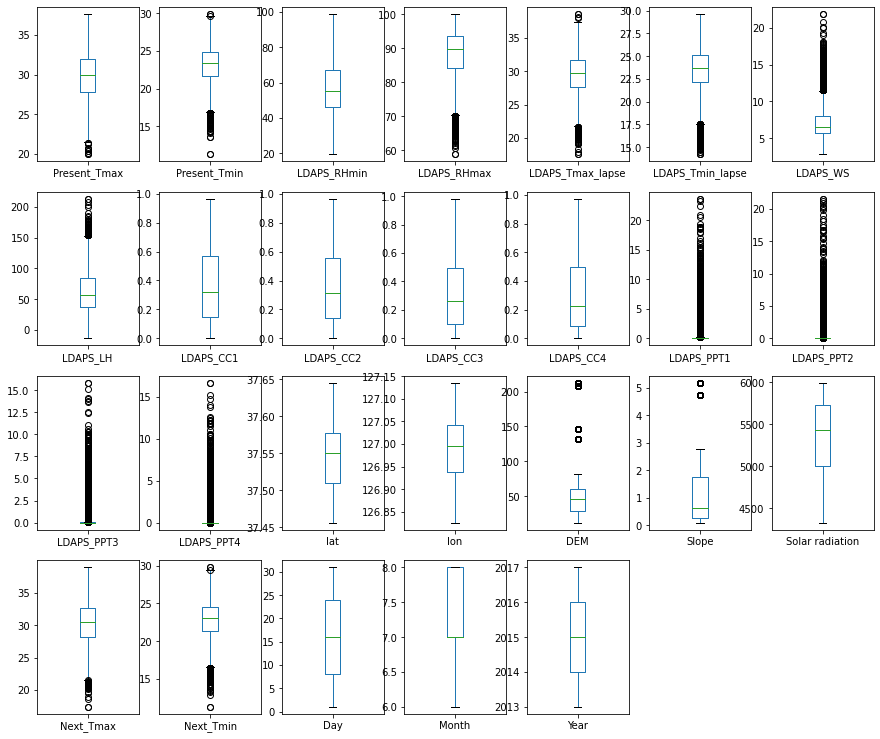

In [26]:
#checking outliers
temp.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

We can see from the box plot that we are having outliers in our dataset. Will proceed further to remove the outiers. We can use:-

1. Z-score
2. IQR

We will try the z-score first

In [27]:
temp.describe()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
count   7752.000000   7752.000000  7752.000000  7752.000000       7752.000000   
mean      29.768211     23.225059    56.759372    88.388529         29.613447   
std        2.956557      2.403036    14.596973     7.158471          2.932898   
min       20.000000     11.300000    19.794666    58.936283         17.624954   
25%       27.800000     21.700000    46.046162    84.316923         27.693091   
50%       29.900000     23.400000    55.313244    89.793480         29.662273   
75%       32.000000     24.900000    67.038254    93.704500         31.683819   
max       37.600000     29.900000    98.524734   100.000153         38.542255   

       LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH    LDAPS_CC1    LDAPS_CC2  \
count       7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean          23.514984     7.092549    62.450457     0.368774     0.356080   
std            2.334099     2.173913    33.571540     0.261185     0.256810   
min           14.272646     2.882580   -13.603212     0.000000     0.000000   
25%           22.114651     5.686487    37.532764     0.148321     0.142328   
50%           23.760199     6.547470    56.865482     0.320110     0.315667   
75%           25.134000     8.007471    83.904586     0.571696     0.554963   
max           29.619342    21.857621   213.414006     0.967277     0.968353   

         LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1   LDAPS_PPT2   LDAPS_PPT3  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.317864     0.298499     0.586267     0.480310     0.275508   
std       0.249208     0.253211     1.937198     1.754900     1.156495   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.103100     0.082741     0.000000     0.000000     0.000000   
50%       0.262555     0.227664     0.000000     0.000000     0.000000   
75%       0.494007     0.497230     0.049122     0.016748     0.007231   
max       0.983789     0.974710    23.701544    21.621661    15.841235   

        LDAPS_PPT4          lat          lon          DEM        Slope  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.266801    37.544722   126.991397    61.867972     1.257048   
std       1.200654     0.050352     0.079435    54.279780     1.370444   
min       0.000000    37.456200   126.826000    12.370000     0.098475   
25%       0.000000    37.510200   126.937000    28.700000     0.271300   
50%       0.000000    37.550700   126.995000    45.716000     0.618000   
75%       0.000000    37.577600   127.042000    59.832400     1.767800   
max      16.655469    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean       5341.502803    30.274887    22.932220    15.987487     7.467879   
std         429.158867     3.122557     2.483276     8.920337     0.530334   
min        4329.520508    17.400000    11.300000     1.000000     6.000000   
25%        4999.018555    28.200000    21.400000     8.000000     7.000000   
50%        5436.345215    30.500000    23.100000    16.000000     7.000000   
75%        5728.316406    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000     8.000000   

              Year  
count  7752.000000  
mean   2015.000516  
std       1.414487  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000

In [28]:
from scipy.stats import zscore
temp_zscore = np.abs(zscore(temp))
temp_zscore

array([[0.36132577, 0.75952931, 0.10251523, ..., 1.57095147, 2.76801715,
        1.41439608],
       [0.72108401, 0.6762959 , 0.30802721, ..., 1.57095147, 2.76801715,
        1.41439608],
       [0.61960809, 0.03118815, 0.55281415, ..., 1.57095147, 2.76801715,
        1.41439608],
       ...,
       [2.22171758, 2.42419767, 2.31750374, ..., 1.57095147, 1.00343358,
        1.41366644],
       [3.30412736, 4.9628169 , 2.5325175 , ..., 1.57095147, 1.00343358,
        1.41366644],
       [2.64912642, 2.77789093, 2.86141898, ..., 1.57095147, 1.00343358,
        1.41366644]])

We called zscore form scipy.stats and detecting outliers in the dataset. 

In [29]:
temp_new = temp[(temp_zscore < 3).all(axis=1)]
print("New shape",temp_new.shape)
print('origional Shape',temp.shape)

New shape (6894, 26)
origional Shape (7752, 26)


We can see that we have successfulyy removed the outliers from the dataset. 

In [30]:
data_loss = ((7752-6894)/7752)*100
data_loss

11.06811145510836

We can see that we are having a data loss of 11%. Hence we will try removing outliers using the IQR method. 

In [31]:
def IQR(y):
    q1 = temp[y].quantile(.25)
    q3 = temp[y].quantile(.75)
    iqr = q3-q1
    high_range = q3 + (1.5*iqr)  
    low_range = q1 - (1.5*iqr)
    #(temp[temp[y] > high_range])
    #(temp[temp[y] < low_range]) 
    
    temp[y] = np.where(
    temp[y] > high_range,
    high_range,
    np.where(
        temp[y] < low_range,
        low_range,
        temp[y]))   

We created a function that will take column name as an input and will calculate the 25th and 75th quartile of the column and calculate the IQR, high range and low range of the column. Then, we use np.where which 3 conditions where we entered if column value is above high range change it to high range and if below low range change to low range and leave it as it is if the value is betwen high range and low range

In [32]:
col

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [33]:
outliers_col = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope']

We created a list of columns having outliers after identyfying them from the box plot. 

In [34]:
for i in outliers_col:
    IQR(i)

Here we are running a loop which will pas each column to the above finction and will remove the outliers from the column. 

Present_Tmax            AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Present_Tmin         AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
LDAPS_RHmin          AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
LDAPS_RHmax          AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
LDAPS_Tmax_lapse     AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
LDAPS_Tmin_lapse     AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
LDAPS_WS             AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
LDAPS_LH               AxesSubplot(0.125,0.518913;0.0945122x0.16413)
LDAPS_CC1           AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
LDAPS_CC2           AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
LDAPS_CC3           AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
LDAPS_CC4           AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
LDAPS_PPT1          AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
LDAPS_PPT2          AxesSubplot(0.805488,0.518913;0.0945122x0.16413)
LDAPS_PPT3             AxesSubplot

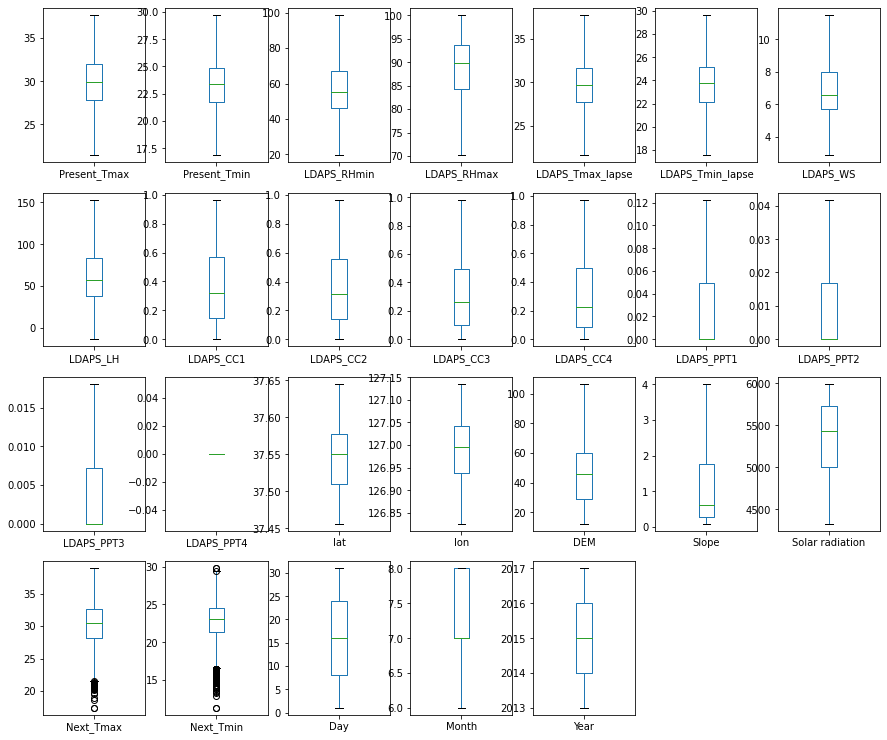

In [35]:
temp.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13)) 

As we can check that we have successfully removed all the outliers from the dataset. 

-0.2548649235405904
No skewness is present in Present_Tmax


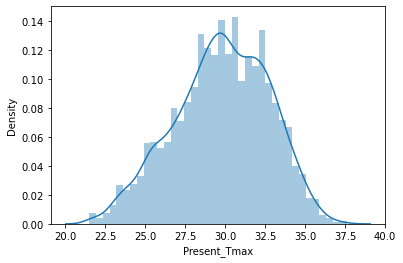

-0.26050782089872415
No skewness is present in Present_Tmin


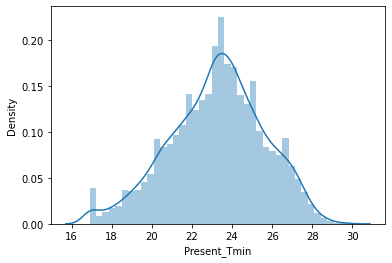

0.3002197698996116
No skewness is present in LDAPS_RHmin


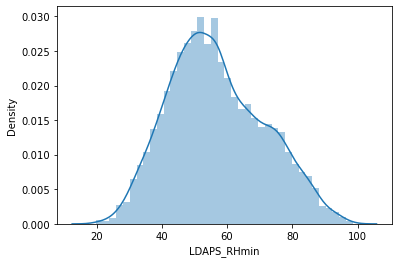

-0.7387073309608292
LDAPS_RHmax Column is having skewness


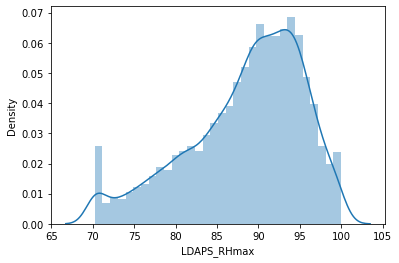

-0.16721806102117148
No skewness is present in LDAPS_Tmax_lapse


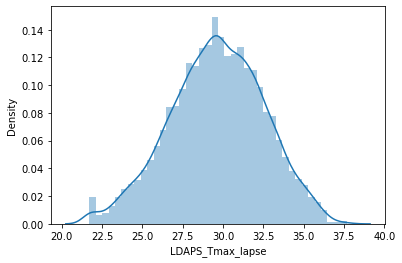

-0.415602381457533
No skewness is present in LDAPS_Tmin_lapse


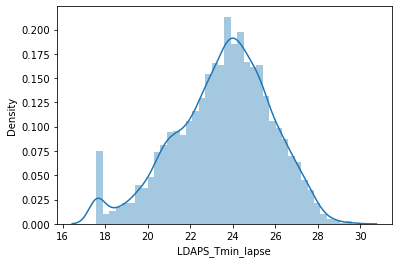

0.8212841262479561
LDAPS_WS Column is having skewness


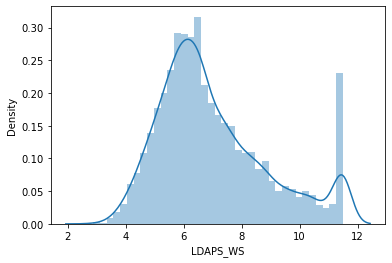

0.6026649318754477
LDAPS_LH Column is having skewness


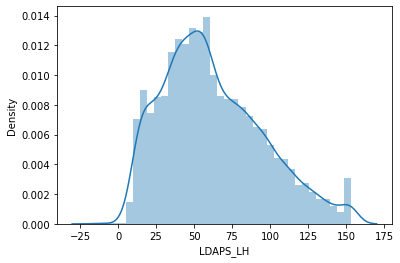

0.4594577878954557
No skewness is present in LDAPS_CC1


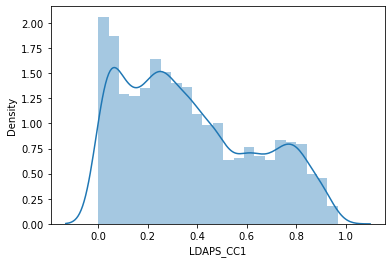

0.47234984539625413
No skewness is present in LDAPS_CC2


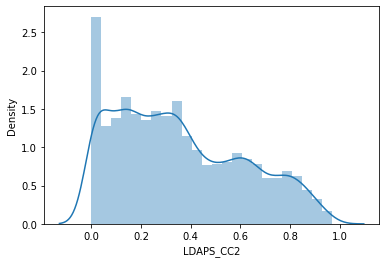

0.646670357953343
LDAPS_CC3 Column is having skewness


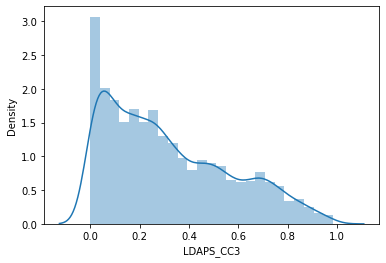

0.6737002475545949
LDAPS_CC4 Column is having skewness


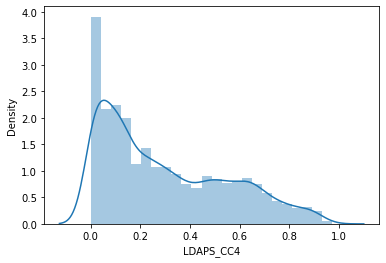

1.1692303452597235
LDAPS_PPT1 Column is having skewness


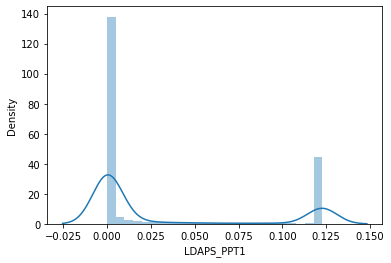

1.1700978358537186
LDAPS_PPT2 Column is having skewness


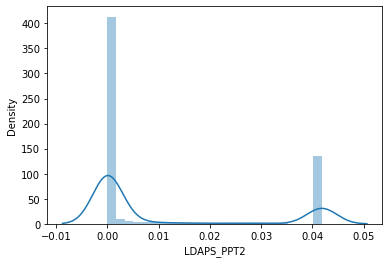

1.175623705619904
LDAPS_PPT3 Column is having skewness


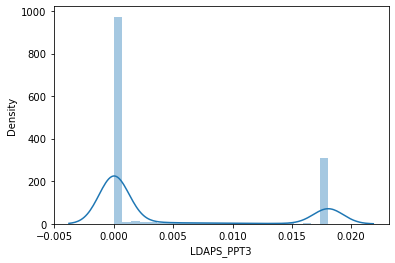

0
No skewness is present in LDAPS_PPT4


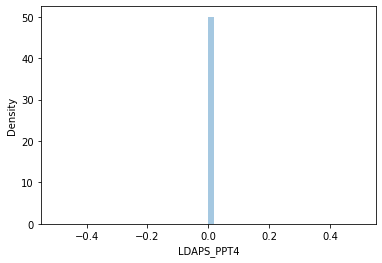

0.08706183721871351
No skewness is present in lat


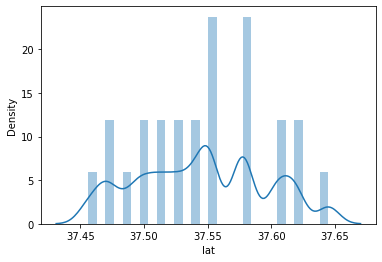

-0.2852130227926117
No skewness is present in lon


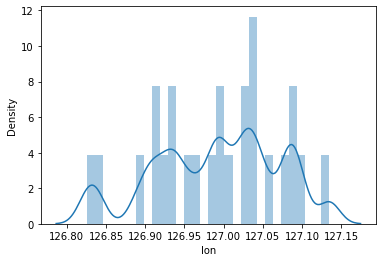

0.7296894685652483
DEM Column is having skewness


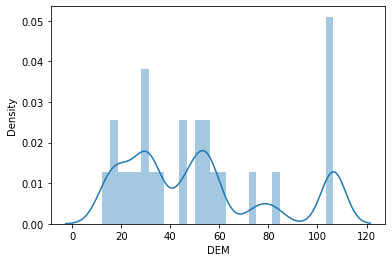

1.1811274383490988
Slope Column is having skewness


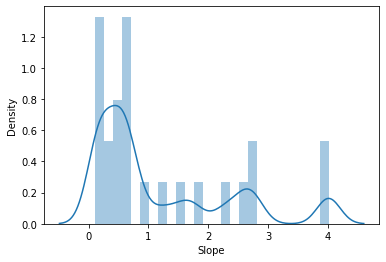

-0.5112097190830602
No skewness is present in Solar radiation


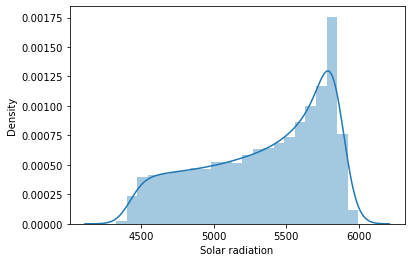

-0.34019991888425033
No skewness is present in Next_Tmax


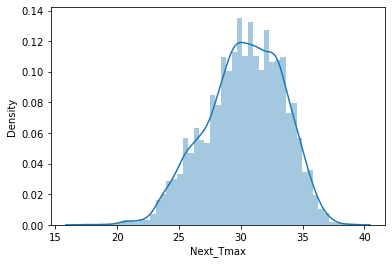

-0.4044474841492746
No skewness is present in Next_Tmin


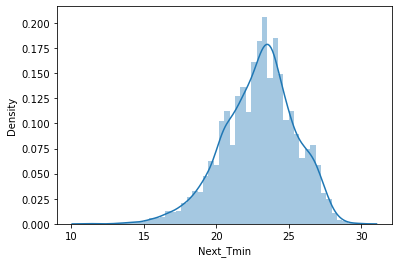

Day is Object datatype

Month is Object datatype

Year is Object datatype



In [36]:
skew_col = []
for i in col:
    if temp[i].dtype == 'float64':
        if (temp[i].skew() > 0.55 or temp[i].skew() < -0.55): 
            print(temp[i].skew())
            print(i,"Column is having skewness")
            skew_col.append(i)
        else:
            print(temp[i].skew())
            print("No skewness is present in",i)
        plt.figure()
        sns.distplot(temp[i])
        plt.show()
    else:
        print(i,"is Object datatype\n")

Checking for skewness and we can see few columns are skewed. We have save dall the skewed columns in a list. 

In [37]:
for i in skew_col:
    print("Skewness in",i,"is:-  ",temp[i].skew())

Skewness in LDAPS_RHmax is:-   -0.7387073309608292
Skewness in LDAPS_WS is:-   0.8212841262479561
Skewness in LDAPS_LH is:-   0.6026649318754477
Skewness in LDAPS_CC3 is:-   0.646670357953343
Skewness in LDAPS_CC4 is:-   0.6737002475545949
Skewness in LDAPS_PPT1 is:-   1.1692303452597235
Skewness in LDAPS_PPT2 is:-   1.1700978358537186
Skewness in LDAPS_PPT3 is:-   1.175623705619904
Skewness in DEM is:-   0.7296894685652483
Skewness in Slope is:-   1.1811274383490988


List of columns having skewness present with the skewness value. 

Skeweness we accept should be between -0.5 to 0.5, the above columns are highly skewed. so, let's try removing skewness from these columns using several methods we have:

1. Log Transform
2. Square Root Transform
3. Box-Cox Transform

In [38]:
from scipy import stats
from scipy.stats import boxcox

Importing boxcox to remove the outliers

Will try to remove the skewness using the yeo johnson method. 

In [39]:
temp.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0         23.006936  6.818887   69.451805   0.233947   0.203896   0.161697   
1         24.035009  5.691890   51.937448   0.225508   0.251771   0.159444   
2         24.565633  6.138224   20.573050   0.209344   0.257469   0.204091   
3         23.326177  5.650050   65.727144   0.216372   0.226002   0.161157   
4         23.486480  5.735004  107.965535   0.151407   0.249995   0.178892   

   LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
0   0.130928         0.0         0.0         0.0         0.0  37.6046   
1   0.127727         0.0         0.0         0.0         0.0  37.6046   
2   0.142125         0.0         0.0         0.0         0.0  37.5776   
3   0.134249         0.0         0.0         0.0         0.0  37.6450   
4   0.170021         0.0         0.0         0.0         0.0  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  106.5310  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013

<function matplotlib.pyplot.show(close=None, block=None)>

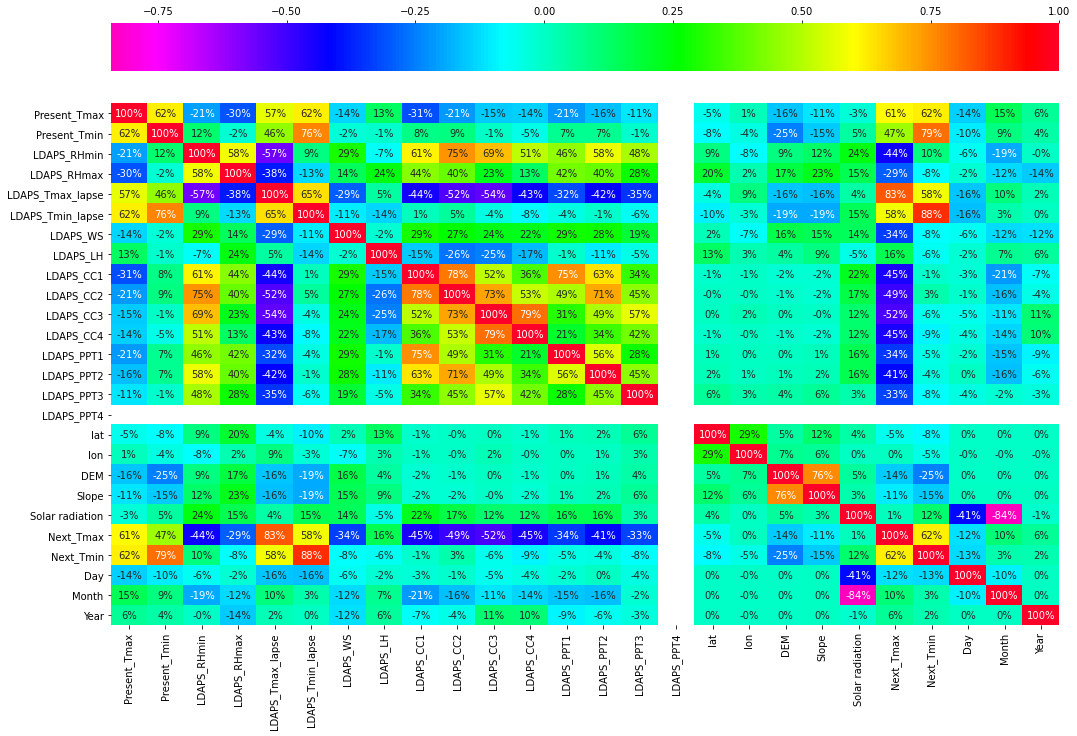

In [40]:
plt.figure(figsize=(17,12))
sns.heatmap(temp.corr(),annot=True, cmap = 'gist_rainbow_r',fmt='.0%',cbar_kws = dict(use_gridspec=False,location="top"))
plt.show

Observation:
1. presentTmax and present_tmin are highly corelated with both the variables. 
2. all columns with LDAPS_ are not correlated with the outputs except LDAPS_Tmax_lapse and LDAPS_Tmin_lapse. Also LDAPS_LH is also showing some collinearity with the dataset. 
4. Lat, long and slope are not corelated with the utput. 
5. We can see some corelation in solar radiation
6. Day soesn't seem to have good corelation with outputs however, month and year have. 

We can drop the above columns or we can use PCA or we can use feature selection as well. 

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Variables"] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
    return (vif)

We created a function above that will take datset as input and will give us the columns with high vaiance inflation factor. 

In [42]:
calc_vif(temp)

Variables    VIF Factor
0       Present_Tmax  3.063068e+02
1       Present_Tmin  3.434616e+02
2        LDAPS_RHmin  1.071839e+02
3        LDAPS_RHmax  3.750232e+02
4   LDAPS_Tmax_lapse  9.064717e+02
5   LDAPS_Tmin_lapse  9.580851e+02
6           LDAPS_WS  1.939487e+01
7           LDAPS_LH  6.873563e+00
8          LDAPS_CC1  1.614938e+01
9          LDAPS_CC2  1.777880e+01
10         LDAPS_CC3  1.477066e+01
11         LDAPS_CC4  6.893222e+00
12        LDAPS_PPT1  3.878785e+00
13        LDAPS_PPT2  3.429044e+00
14        LDAPS_PPT3  2.286816e+00
15        LDAPS_PPT4           NaN
16               lat  6.967610e+05
17               lon  1.667181e+06
18               DEM  1.207569e+01
19             Slope  5.433366e+00
20   Solar radiation  5.597461e+03
21         Next_Tmax  4.576722e+02
22         Next_Tmin  5.817893e+02
23               Day  3.883726e+01
24             Month  5.813646e+03
25              Year  1.277011e+06

Above we get the result for the VIF. As we can check we have all the columns with VIF less than 10 we can proceed. 

In [43]:
temp_2 = temp.copy()
temp_2.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0         23.006936  6.818887   69.451805   0.233947   0.203896   0.161697   
1         24.035009  5.691890   51.937448   0.225508   0.251771   0.159444   
2         24.565633  6.138224   20.573050   0.209344   0.257469   0.204091   
3         23.326177  5.650050   65.727144   0.216372   0.226002   0.161157   
4         23.486480  5.735004  107.965535   0.151407   0.249995   0.178892   

   LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
0   0.130928         0.0         0.0         0.0         0.0  37.6046   
1   0.127727         0.0         0.0         0.0         0.0  37.6046   
2   0.142125         0.0         0.0         0.0         0.0  37.5776   
3   0.134249         0.0         0.0         0.0         0.0  37.6450   
4   0.170021         0.0         0.0         0.0         0.0  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  106.5310  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013

In [44]:
temp_2 = temp_2.drop('Next_Tmax',axis=1)
temp_2 = temp_2.drop('Next_Tmin',axis=1)

In [45]:
temp_2.shape

(7752, 24)

In [46]:
x = temp_2
x.shape

(7752, 24)

In [47]:
y = temp['Next_Tmax']
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

Above we have splitted our dataset to x and y for training ans testing purporse. 

In [48]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

We have checked that our dataset is having some skewness. Using yeo johnson method to remove the skewness. 

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

We are using standard scaler so that our dataset could be in a same class as of now we can see there are some difference in classes. 

In [110]:
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

Above called train test split to split our dataset. All the algorithms required to build a regression problem. r2 score to calculate the score of our model and MSR and MAE to calculate the errors. 

In [136]:
lr = LinearRegression()
svr = SVR()
dec_tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()
rnf = RandomForestRegressor()

We assigning algorithms to separate variables. 

In [137]:
model = [lr,svr,dec_tree,knn,rnf]

We created a list of all the variables. 

In [138]:
random_state = []
def predict_best_state(X):
    for i in range(0,50):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
        X.fit(x_train,y_train)
        predict_train = X.predict(x_train)
        predict_test = X.predict(x_test)
    
        if round(r2_score(y_train,predict_train)*100,1) == round(r2_score(y_test,predict_test)*100,1):
            print("the",X,"performs well at",i,"random state with an accuracy of",r2_score(y_test,predict_test)*100)
            random_state.append(i)
            print("\n")

We created a function to predict the best random state. 

for i in model:
    predict_best_state(i)

We calling the fuction with input as the model names from the list created above

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 45)

We have splitted the datset and the random state as per the result

In [140]:
lr.fit(x_train,y_train)
svr.fit(x_train,y_train)
dec_tree.fit(x_train,y_train)
knn.fit(x_train,y_train)
rnf.fit(x_train,y_train)

RandomForestRegressor()

Datat has been fitted to the algo for traimning

In [141]:
predict_lr = lr.predict(x_test)
predict_svr = svr.predict(x_test)
predict_dec = dec_tree.predict(x_test)
predict_knn = knn.predict(x_test)
predict_rnf= rnf.predict(x_test)

Prediction are made by the algorothms

In [142]:
print('Model Score LR',r2_score(y_test,predict_lr))
print('Model Score SVR',r2_score(y_test,predict_svr))
print('Model Score DEC',r2_score(y_test,predict_dec))
print('Model Score KNN',r2_score(y_test,predict_knn))
print('Model Score RNF',r2_score(y_test,predict_rnf))

Model Score LR 0.7618189310582775
Model Score SVR 0.876637558330391
Model Score DEC 0.7779925381890626
Model Score KNN 0.8956262520481818
Model Score RNF 0.9071480190257561


Here the score shows how our prediction is working. We can say that our data is fitted good for Random forest regressor, fine for SVR and KNN as we are getting acceptable score and fitted bad for LR and DEC as the scores are not so promising. 

In [146]:
from sklearn.metrics import explained_variance_score

In [147]:
explained_variance_score(y_test, predict_rnf)

0.9071647919984424

In [148]:
explained_variance_score(y_test, predict_rnf, multioutput='uniform_average')

0.9071647919984424

Checking score again using explained_variance_score

In [149]:
from sklearn.model_selection import RandomizedSearchCV

We are calling RandomizedSearchCV for hyper parametertuning of our model. 

In [150]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [156]:
rf_random = RandomizedSearchCV(estimator=rnf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1)

Here we are calling RandomizedSearchCV and storing the result into a random variable. 

In [157]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  34.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  35.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  35.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  35.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time=  34.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800; total time=  23.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800; total time=  23.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

Above we trying to fir the data into the random feature using RandomizedSearchCV.fit

In [158]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

The above code will give us the best parametrs used by randomized search CV

In [159]:
rf_random.best_score_

-1.1202868803422663

In [160]:
a = temp_2
a.shape

(7752, 24)

In [161]:
b = temp['Next_Tmin']
b.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [162]:
a = power_transform(a,method='yeo-johnson')

In [163]:
a = sc.fit_transform(a)

In [164]:
lr_min = LinearRegression()
svr_min = SVR()
dec_tree_min = DecisionTreeRegressor()
knn_min = KNeighborsRegressor()
rnf_min = RandomForestRegressor()

In [165]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size = 0.30, random_state = 45)

In [167]:
lr_min.fit(a_train,b_train)
svr_min.fit(a_train,b_train)
dec_tree_min.fit(a_train,b_train)
knn_min.fit(a_train,b_train)
rnf_min.fit(a_train,b_train)

RandomForestRegressor()

In [168]:
predict_lr_min = lr.predict(a_test)
predict_svr_min = svr.predict(a_test)
predict_dec_min = dec_tree.predict(a_test)
predict_knn_min = knn.predict(a_test)
predict_rnf_min = rnf.predict(a_test)

In [169]:
print('Model Score LR_MIN',r2_score(y_test,predict_lr_min))
print('Model Score SVR_MIN',r2_score(y_test,predict_svr_min))
print('Model Score DEC_MIN',r2_score(y_test,predict_dec_min))
print('Model Score KNN_MIN',r2_score(y_test,predict_knn_min))
print('Model Score RNF_MIN',r2_score(y_test,predict_rnf_min))

Model Score LR_MIN 0.7618189310582775
Model Score SVR_MIN 0.8766375583303908
Model Score DEC_MIN 0.7779925381890626
Model Score KNN_MIN 0.8956262520481818
Model Score RNF_MIN 0.9071480190257561


In [170]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [171]:
rf_random_min = RandomizedSearchCV(estimator=rnf_min,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1)

In [172]:
rf_random_min.fit(a_train,b_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   9.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   8.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   9.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   8.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   8.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=  34.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=  35.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=5, n

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [173]:
rf_random_min.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [174]:
rf_random_min.best_score_

-0.6068490254672592

# Trying after dropping few columns

In [175]:
temp.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0         23.006936  6.818887   69.451805   0.233947   0.203896   0.161697   
1         24.035009  5.691890   51.937448   0.225508   0.251771   0.159444   
2         24.565633  6.138224   20.573050   0.209344   0.257469   0.204091   
3         23.326177  5.650050   65.727144   0.216372   0.226002   0.161157   
4         23.486480  5.735004  107.965535   0.151407   0.249995   0.178892   

   LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
0   0.130928         0.0         0.0         0.0         0.0  37.6046   
1   0.127727         0.0         0.0         0.0         0.0  37.6046   
2   0.142125         0.0         0.0         0.0         0.0  37.5776   
3   0.134249         0.0         0.0         0.0         0.0  37.6450   
4   0.170021         0.0         0.0         0.0         0.0  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  106.5310  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013

In [177]:
temp_3 = temp.copy()
temp_3.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [201]:
temp_max_x = temp_3.drop(['Present_Tmax', 'Present_Tmin','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_LH', 'Next_Tmax', 'Next_Tmin', 'Month', 'Year'],axis =1)
temp_max_x.shape

(7752, 17)

In [202]:
temp_max_y = temp_3['Next_Tmax']
temp_max_y.shape

(7752,)

In [182]:
temp_max_x = power_transform(temp_max_x,method='yeo-johnson')

In [183]:
temp_max_x = sc.fit_transform(temp_max_x)

In [195]:
c_train,c_test,d_train,d_test = train_test_split(temp_max_x,temp_max_y,test_size = 0.30, random_state = 50) 

In [196]:
lr_max_x = LinearRegression()
svr_max_x = SVR()
dec_tree_max_x = DecisionTreeRegressor()
knn_max_x = KNeighborsRegressor()
rnf_max_x = RandomForestRegressor()

In [197]:
lr_max_x.fit(c_train,d_train)
svr_max_x.fit(c_train,d_train)
dec_tree_max_x.fit(c_train,d_train)
knn_max_x.fit(c_train,d_train)
rnf_max_x.fit(c_train,d_train)

RandomForestRegressor()

In [198]:
predict_lr_max_x = lr_max_x.predict(c_test)
predict_svr_max_x = svr_max_x.predict(c_test)
predict_dec_tree_max_x = dec_tree_max_x.predict(c_test)
predict_knn_max_x = knn_max_x.predict(c_test)
predict_rnf_max_x = rnf_max_x.predict(c_test)

In [200]:
print('Model Score LR',r2_score(d_test,predict_lr_max_x))
print('Model Score SVR',r2_score(d_test,predict_svr_max_x))
print('Model Score DEC',r2_score(d_test,predict_dec_tree_max_x))
print('Model Score KNN',r2_score(d_test,predict_knn_max_x))
print('Model Score RNF',r2_score(d_test,predict_rnf_max_x))

Model Score LR 0.36995897595280314
Model Score SVR 0.6756040487639519
Model Score DEC 0.7287212765611295
Model Score KNN 0.7685519594711872
Model Score RNF 0.8701678229881897


In [203]:
import pickle
filename = 'temprature_max_prediction.pkl'
pickle.dump(rnf, open(filename, 'wb'))

In [204]:
import pickle
filename = 'temprature_min_prediction.pkl'
pickle.dump(rnf_min, open(filename, 'wb'))